In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

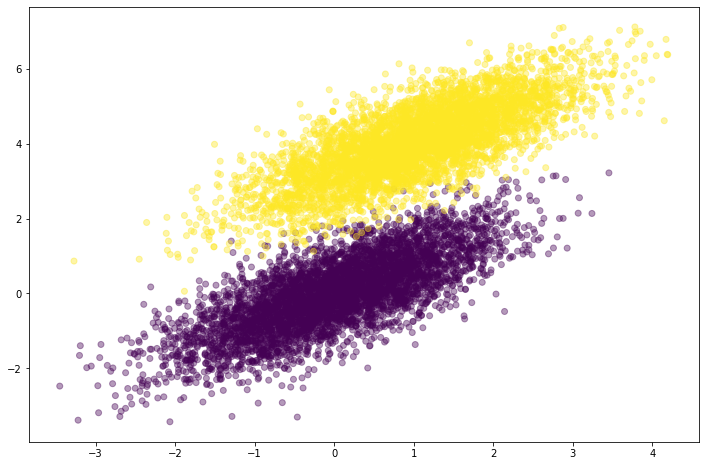

In [2]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_features[:, 0], simulated_features[:, 1],
            c = simulated_labels, alpha = .4)

In [3]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [4]:
# def log_likelihood(features, target, weights):
#     scores = np.dot(features, weights)
#     ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
#     return ll

In [5]:
def error_formula(x, y, weights):
    output = sigmoid(np.dot(x, weights))
    return np.sum(- y*np.log(output) - (1 - y) * np.log(1-output))

In [6]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print ('Cross-Entropy: ', - error_formula(features, target, weights))
        
    return weights

In [7]:
weights = logistic_regression(simulated_features, simulated_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

Cross-Entropy:  -4346.264779152364
Cross-Entropy:  -148.7067227680535
Cross-Entropy:  -142.9649362310784
Cross-Entropy:  -141.54530307157364
Cross-Entropy:  -141.06031965930805
Cross-Entropy:  -140.8703158589161
Cross-Entropy:  -140.7902591275381
Cross-Entropy:  -140.75505002269912
Cross-Entropy:  -140.73914503180953
Cross-Entropy:  -140.73183498915876
Cross-Entropy:  -140.7284366669483
Cross-Entropy:  -140.72684471255334
Cross-Entropy:  -140.72609508950467
Cross-Entropy:  -140.72574086052293
Cross-Entropy:  -140.72557306887168
Cross-Entropy:  -140.72549345786175
Cross-Entropy:  -140.7254556425076
Cross-Entropy:  -140.7254376661433
Cross-Entropy:  -140.72542911609162
Cross-Entropy:  -140.72542504794768
Cross-Entropy:  -140.72542311181707
Cross-Entropy:  -140.72542219020238
Cross-Entropy:  -140.72542175145276
Cross-Entropy:  -140.72542154256132
Cross-Entropy:  -140.7254214431011
Cross-Entropy:  -140.72542139574284
Cross-Entropy:  -140.7254213731925
Cross-Entropy:  -140.7254213624546
Cro

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_features, simulated_labels)

print (clf.intercept_, clf.coef_)
print (weights)

[-14.09231079] [[-5.05902155  8.28959202]]
[-14.09225541  -5.05899648   8.28955762]


In [9]:
data_with_intercept = np.hstack((np.ones((simulated_features.shape[0], 1)),
                                 simulated_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))
print ('Accuracy from sk-learn: {0}'.format(clf.score(simulated_features, simulated_labels)))

Accuracy from scratch: 0.9948
Accuracy from sk-learn: 0.9948


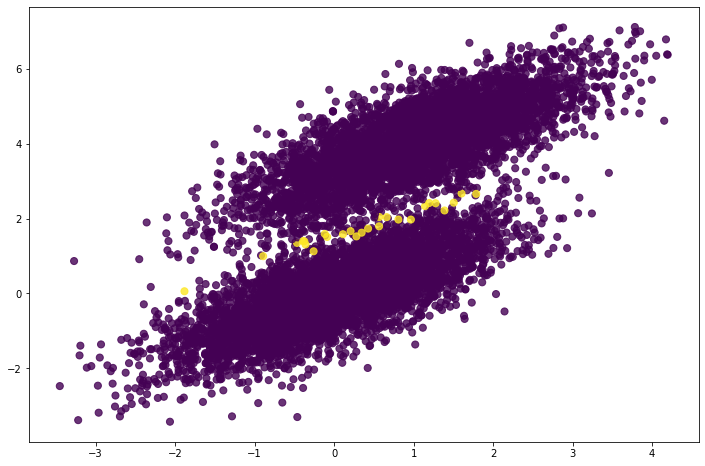

In [11]:
plt.figure(figsize = (12, 8))
plt.scatter(simulated_features[:, 0], simulated_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)